In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\kiran\OneDrive\Desktop\LSTM\AirPassengers.csv')

# Show the first few rows
print(data.head())


     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


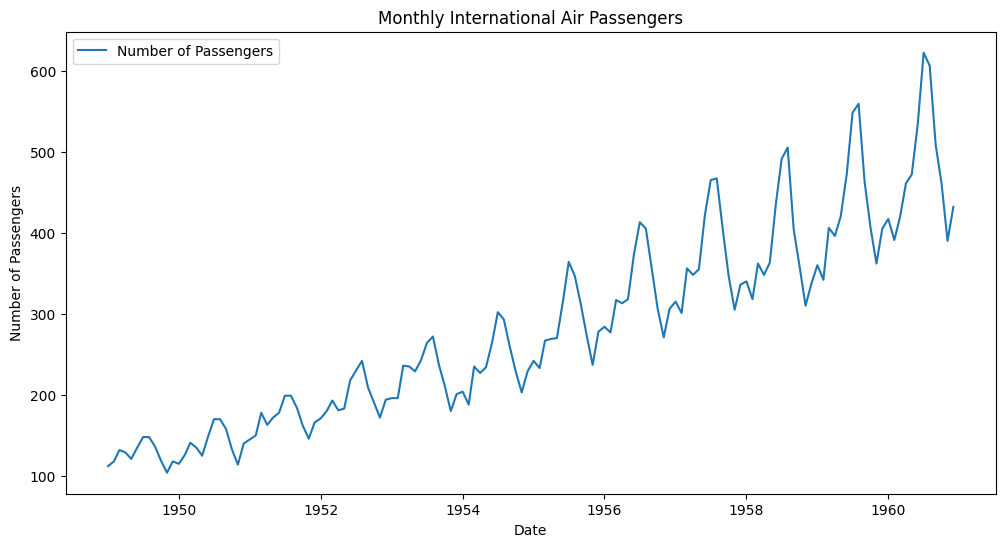

In [5]:
import matplotlib.pyplot as plt

# Convert 'Month' column to datetime (very important for time series)
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as the index
data.set_index('Month', inplace=True)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(data, label='Number of Passengers')
plt.title('Monthly International Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data[:5])  # Show first 5 scaled values


[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]]


In [8]:
# Create the sequences
X = []
y = []
sequence_length = 12  # We look at the past 12 months to predict the next month

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to be [samples, time steps, features] which is what LSTM expects
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (132, 12, 1)
y shape: (132,)


In [9]:
# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (105, 12, 1)
Testing set size: (27, 12, 1)


In [16]:
!pip install tensorflow scikit-learn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()

# Add the LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add a Dense (fully connected) layer to output the prediction
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Show model summary
model.summary()




[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: c:\users\kiran\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


c:\Users\kiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0592 - val_loss: 0.1039
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - val_loss: 0.0215
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - val_loss: 0.0218
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - val_loss: 0.0311
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0095 - val_loss: 0.0334
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0080 - val_loss: 0.0229
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0075 - val_loss: 0.0221
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0080 - val_loss: 0.0217
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0066 - val_loss: 0.0221
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - val_loss: 0.0214
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068 - val_loss: 0.0216
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0060 - val_loss: 0.0218
E

In [19]:
# Predict on test data
y_predicted = model.predict(X_test)

# Since our data was scaled, we need to "reverse" the scaling
# (bring values back to original range)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_predicted_original = scaler.inverse_transform(y_predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


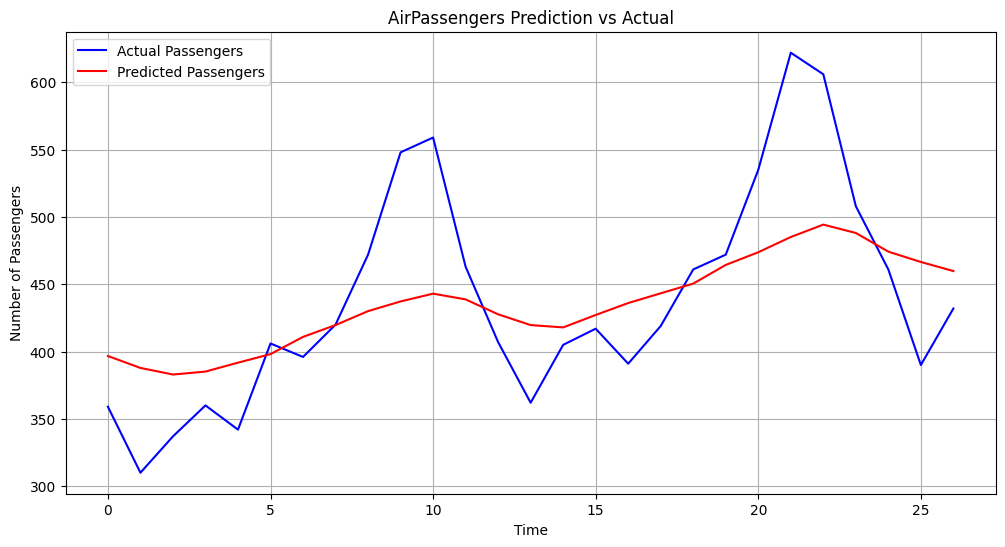

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_original, label='Actual Passengers', color='blue')
plt.plot(y_predicted_original, label='Predicted Passengers', color='red')
plt.title('AirPassengers Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()
